In [10]:
# Fecha;HORA;PAB01_PTR_I02_PV
# 03/10/2022;0:00:00;5.70074
# 03/10/2022;0:10:00;5.69762

# load datos_presiones.csv

import pandas as pd

df = pd.read_csv('datos_presiones.csv', sep=';')
# PAB01_PTR_I02_PV [kg/cm2] -> Presion [MPa]
df['Presion'] = df['PAB01_PTR_I02_PV'] * 0.0980665
df.head()

,Fecha,HORA,PAB01_PTR_I02_PV,Presion
0,03/10/2022,0:00:00,5.70074,0.559052
1,03/10/2022,0:10:00,5.69762,0.558746
2,03/10/2022,0:20:00,5.64203,0.553294
3,03/10/2022,0:30:00,5.62563,0.551686
4,03/10/2022,0:40:00,5.62426,0.551551


In [11]:
df["timestamp"] = pd.to_datetime(df["Fecha"] + " " + df["HORA"], format='%d/%m/%Y %H:%M:%S')
df["tspan"] = df["timestamp"] - df["timestamp"].iloc[0]
df["tspan"] = df["tspan"].dt.total_seconds()/(600*3)

In [12]:
df["tspan"]

0            0.000000
1            0.333333
2            0.666667
3            1.000000
4            1.333333
             ...     
51403    17134.333333
51404    17134.666667
51405    17135.000000
51406    17135.333333
51407    17135.666667
Name: tspan, Length: 51408, dtype: float64

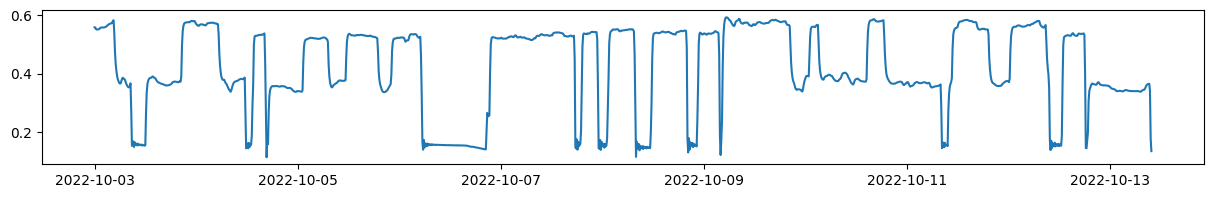

In [13]:
from matplotlib import pyplot as plt
final = 1500
fig = plt.figure(figsize=(15, 2))
plt.plot(df['timestamp'][:final], 
         df['Presion'][:final],
         '-')

In [14]:
df[:800].to_csv('datos_presiones_prepo.csv', sep=';', index=False)

In [15]:
df["tspan"][:800]

0        0.000000
1        0.333333
2        0.666667
3        1.000000
4        1.333333
          ...    
395    131.666667
396    132.000000
397    132.333333
398    132.666667
399    133.000000
Name: tspan, Length: 400, dtype: float64

In [16]:
df["tspan"].values

array([0.00000000e+00, 3.33333333e-01, 6.66666667e-01, ...,
       1.71350000e+04, 1.71353333e+04, 1.71356667e+04])

In [17]:
df["Presion"].values

array([0.55905162, 0.55874565, 0.55329413, ..., 0.57705859, 0.57773427,
       0.57628779])

In [18]:
df = pd.read_csv("datos_presiones_prepo.csv", sep=';')
df


,Fecha,HORA,PAB01_PTR_I02_PV,Presion,timestamp,tspan
0,03/10/2022,0:00:00,5.70074,0.559052,2022-10-03 00:00:00,0.000000
1,03/10/2022,0:10:00,5.69762,0.558746,2022-10-03 00:10:00,0.333333
2,03/10/2022,0:20:00,5.64203,0.553294,2022-10-03 00:20:00,0.666667
3,03/10/2022,0:30:00,5.62563,0.551686,2022-10-03 00:30:00,1.000000
4,03/10/2022,0:40:00,5.62426,0.551551,2022-10-03 00:40:00,1.333333
...,...,...,...,...,...,...
395,05/10/2022,17:50:00,5.37440,0.527049,2022-10-05 17:50:00,131.666667
396,05/10/2022,18:00:00,5.37367,0.526977,2022-10-05 18:00:00,132.000000
397,05/10/2022,18:10:00,5.36976,0.526594,2022-10-05 18:10:00,132.333333
398,05/10/2022,18:20:00,5.36088,0.525723,2022-10-05 18:20:00,132.666667
